# Reshaping Exercises

Before diving into actually doing some exercises, a few notes about reshaping in `pandas`. 

**So many tools:** As is so often the case with `pandas`, when there are multiple ways that something can be done, `pandas` implements all of them, even it if results in a lot of duplication of funcationality. As a result, there are several sets of methods that do very similar things, and which can be hard to keep straights: 

- `melt` and `pivot`: Tools for moving a dataset from long-to-wide (`pivot`) or wide-to-long (`melt`).
- `pivot_table`: Like `pivot`, but allows you to do aggregations during the reshape if you want.
- `stack` and `unstack`: Like `melt` and `pivot`, but only for use when your variables are stored in indices. I don't use these much. 

Personally, **I find melt and pivot most useful.** `pivot_table` *can* do aggregations during the reshape, but you can always do aggregations yourself using `groupby`. :) 

Also, I have to go look at [these pictures](https://pandas.pydata.org/pandas-docs/stable/user_guide/reshaping.html)... every time I reshape. Don't hesistate to look them up for help!

**What SHOULD I want my data to look like?** Just a reminder that a natural question to ask is "in what format should I want my data?" Obviously this question is subjective, but as you read in the Hadley Wickham [piece I assigned](http://vita.had.co.nz/papers/tidy-data.html), this is a good standard definition for a "tidy" dataset to which we might aspire: 

1. Each variable forms a column.
2. Each observation forms a row.
3. Each type of observational unit forms a table.

In general, I'm a big fan of this approach, and I think it's a good one to use (especially numbers 1 and 2).

Note that the question of what forms an "observation" depends on the analysis you plan to run (which depends on the answer you seek to ask! See! EVERYTHING ALWAYS COMES BACK TO THE QUESTION YOU ARE SEEKING TO ANSWER!). Suppose you have data on GDP from different countries for many years. If you plan to run a panel analysis where each observation is a country-year, then each row should be a country-year. But if you plan to do a country-level analysis using measures of, say, GDP variation over time, then each row should be a country!



## Exercises!

So in this exercise, we're going to work with data from the World Development Indicators. Unlike in previous exercises, however, where I cleaned up the data before giving it to you, we'll be working with the raw data just as you would get it from the World Bank download site. 


## Gradescope Autograding

Please follow [all standard guidance](https://www.practicaldatascience.org/html/autograder_guidelines.html) for submitting this assignment to the Gradescope autograder, including storing your solutions in a dictionary called `results` and ensuring your notebook runs from the start to completion without any errors.

For this assignment, please name your file `exercise_reshaping.ipynb` before uploading.

You can check that you have answers for all questions in your `results` dictionary with this code:

```python
assert set(results.keys()) == {
    "ex2_num_rows",
    "ex4_num_rows",
    "ex5_num_countries",
    "ex6_relationship",
    "ex7_relationship",
    "ex8_countries_in_panel",
    "ex10_demeaned_corr",
}
```


### Submission Limits

Please remember that you are **only allowed three submissions to the autograder.** Your last submission (if you submit 3 or fewer times), or your third submission (if you submit more than 3 times) will determine your grade Submissions that error out will **not** count against this total.

In [1]:
import numpy as np
import pandas as pd

pd.set_option("mode.copy_on_write", True)

import warnings

warnings.simplefilter(action="ignore", category=FutureWarning)
results = {}

c:\Users\kbagh\miniconda3\Lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\Users\kbagh\miniconda3\Lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
c:\Users\kbagh\miniconda3\Lib\site-packages\numpy\.libs\libopenblas64__v0.3.23-246-g3d31191b-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


### Exercise 1

Import the data using a link from [here](https://github.com/nickeubank/MIDS_Data/blob/master/World_Development_Indicators/raw_WDI_Data_csv.zip) and load it into pandas without unzipping it (did you know pandas will read zip files directly?!).

In [2]:
df = pd.read_csv(
    "https://github.com/nickeubank/MIDS_Data/raw/master/World_Development_Indicators/raw_WDI_Data_csv.zip"
)
df

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,Unnamed: 63
0,Arab World,ARB,"2005 PPP conversion factor, GDP (LCU per inter...",PA.NUS.PPP.05,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Arab World,ARB,"2005 PPP conversion factor, private consumptio...",PA.NUS.PRVT.PP.05,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arab World,ARB,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,82.368101,82.783289,83.120303,83.533457,83.897596,84.171599,84.510171,NaN,NaN,NaN
3,Arab World,ARB,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,86.007620,86.428272,87.070576,88.176836,87.342739,89.130121,89.678685,90.273687,NaN,NaN
4,Arab World,ARB,"Access to electricity, rural (% of rural popul...",EG.ELC.ACCS.RU.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,73.466653,73.942103,75.244104,77.162305,75.538976,78.741152,79.665635,80.749293,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
422131,Zimbabwe,ZWE,Women who believe a husband is justified in be...,SG.VAW.NEGL.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,21.400000,NaN,NaN,NaN,21.400000,NaN,NaN,NaN,NaN
422132,Zimbabwe,ZWE,Women who believe a husband is justified in be...,SG.VAW.REFU.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,16.900000,NaN,NaN,NaN,14.500000,NaN,NaN,NaN,NaN
422133,Zimbabwe,ZWE,Women who were first married by age 15 (% of w...,SP.M15.2024.FE.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,3.900000,NaN,NaN,NaN,3.700000,NaN,NaN,NaN,NaN
422134,Zimbabwe,ZWE,Women who were first married by age 18 (% of w...,SP.M18.2024.FE.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,30.500000,NaN,NaN,33.500000,32.400000,NaN,NaN,NaN,NaN


### Exercise 2

In this exercise, we'd like to look at the relationship between GDP and inequality across countries. So before anything else, thin down your dataset by getting only the rows related to:

- GDP per capita (in Constant US Dollars -- the "constant" means values are have been adjusted for inflation, so values from 1970 can be directly compared with 2010)
- Gini coefficient
- Information on income shares (what percentage of total income goes to X% of the income distribution). **There are 7 of these in total.**

Store the number of rows you get from this updated dataset in `"ex2_num_rows"`.

**NOTE:** this is non-trivial. This is a big dataset with LOTS of variables, so you'll have to use your data wrangling skills to see all the variables names. Remember that if you want to see all the entries in something but python compresses it (so it doesn't take up too much space), you can loop over it and print each item separately to make it show everything!

**NOTE 2:** If you _do_ print out all the variable names, please comment out the code before you submit your notebook so graders don't end up swimming in print-outs. 

In [3]:
working_df = df[
    df["Indicator Name"].isin(
        [
            "GINI index (World Bank estimate)",
            "GDP per capita (constant 2010 US$)",
            "Income share held by fourth 20%",
            "Income share held by highest 10%",
            "Income share held by highest 20%",
            "Income share held by lowest 10%",
            "Income share held by lowest 20%",
            "Income share held by second 20%",
            "Income share held by third 20%",
        ]
    )
]
print("The following is the dataset with all of the requested data")
working_df

The following is the dataset with all of the requested data


,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,Unnamed: 63
520,Arab World,ARB,GDP per capita (constant 2010 US$),NY.GDP.PCAP.KD,NaN,NaN,NaN,NaN,NaN,NaN,...,5945.678558,6021.163952,6278.734889,6336.581939,6354.885748,6430.464609,6507.882895,6447.294731,6458.734486,NaN
540,Arab World,ARB,GINI index (World Bank estimate),SI.POV.GINI,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
655,Arab World,ARB,Income share held by fourth 20%,SI.DST.04TH.20,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
656,Arab World,ARB,Income share held by highest 10%,SI.DST.10TH.10,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
657,Arab World,ARB,Income share held by highest 20%,SI.DST.05TH.20,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421194,Zimbabwe,ZWE,Income share held by highest 20%,SI.DST.05TH.20,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,49.700000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
421195,Zimbabwe,ZWE,Income share held by lowest 10%,SI.DST.FRST.10,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,2.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
421196,Zimbabwe,ZWE,Income share held by lowest 20%,SI.DST.FRST.20,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,5.800000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
421197,Zimbabwe,ZWE,Income share held by second 20%,SI.DST.02ND.20,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,9.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
results["ex2_num_rows"] = working_df.shape[0]
print(f"The number of rows in this dataset is {results['ex2_num_rows']}")

The number of rows in this dataset is 2376


### Exercise 3¶
OK, that makes our data a lot more manageable, but it’s still pretty heinous.

In our analysis, we know that we’ll want to have country-years as our units of observation, so let’s start reshaping. Come up with a strategy that gets our inequality variables as columns, and makes each of our future observations (i.e. each country-year) a row.

Hint: It can sometimes be helpful to drop useless columns before a reshape.

Other hint: Sometimes you will end up with your column names stored in a hierarchical (multi-level) .column object structure. As with hierarchical indices for rows, they’re a pain. (Whether this occurs depends on the exact syntax you use, so you may or may not get it).

The two easy ways to fix these hierarchical .column objects are:

Just drop a level: df.columns.drop_level(0)` where 0 is which level you want to drop.

Directly manipulate the column names by doing something to the df.columns object and re-assigning to df.columns. For example, you can just concatenate two columns levels (they’re stored as tuples) with a dash between them with df.columns = map(lambda x: str(x[0]) + "-" + str(x[1]), df.columns).

In [5]:
working_df = working_df.drop(["Unnamed: 63", "Indicator Code", "Country Code"], axis=1)

In [6]:
working_df

,Country Name,Indicator Name,1960,1961,1962,1963,1964,1965,1966,1967,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
520,Arab World,GDP per capita (constant 2010 US$),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5810.11207,5945.678558,6021.163952,6278.734889,6336.581939,6354.885748,6430.464609,6507.882895,6447.294731,6458.734486
540,Arab World,GINI index (World Bank estimate),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
655,Arab World,Income share held by fourth 20%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
656,Arab World,Income share held by highest 10%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
657,Arab World,Income share held by highest 20%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421194,Zimbabwe,Income share held by highest 20%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,49.700000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
421195,Zimbabwe,Income share held by lowest 10%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,2.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
421196,Zimbabwe,Income share held by lowest 20%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,5.800000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
421197,Zimbabwe,Income share held by second 20%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,9.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
per_row_df = pd.melt(
    working_df,
    id_vars=["Country Name", "Indicator Name"],
    var_name="Year",
    value_name="Value",
)

pivoted_df = pd.pivot(
    per_row_df, index=["Country Name", "Year"], columns="Indicator Name", values="Value"
).reset_index()

print(
    "The following below is the dataframe with the rows as each Country-Year pair, and the Inequality Variables as columns"
)
pivoted_df

The following below is the dataframe with the rows as each Country-Year pair, and the Inequality Variables as columns


Indicator Name,Country Name,Year,GDP per capita (constant 2010 US$),GINI index (World Bank estimate),Income share held by fourth 20%,Income share held by highest 10%,Income share held by highest 20%,Income share held by lowest 10%,Income share held by lowest 20%,Income share held by second 20%,Income share held by third 20%
0,Afghanistan,1960,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,1961,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,1962,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,1963,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,1964,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
15571,Zimbabwe,2014,1232.864865,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15572,Zimbabwe,2015,1234.103352,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15573,Zimbabwe,2016,1224.309922,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15574,Zimbabwe,2017,1263.321322,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Exercise 4

Now that you've done your reshapes, subset for observations that are post-1980. Store the number of rows in your reshaped data with only data from the years after 1980 in `"ex4_num_rows"`.

In [8]:
post_1980 = pivoted_df[pivoted_df["Year"] > "1980"]
results["ex4_num_rows"] = post_1980.shape[0]
print(
    f"The total number of rows in the dataset after filtering for years after 1980 is {results['ex4_num_rows']}"
)

The total number of rows in the dataset after filtering for years after 1980 is 10032


### Exercise 5

Subset for observations for which we have GINI index estimates. How many unique *countries* do you end up with? Store this answer in `ex5_num_countries`.

In [9]:
gini_only = post_1980[["Country Name", "Year", "GINI index (World Bank estimate)"]]
no_na_gini = gini_only[~gini_only["GINI index (World Bank estimate)"].isna()]
print("The following below is the dataframe with GINI values that are not NaN")
no_na_gini

The following below is the dataframe with GINI values that are not NaN


Indicator Name,Country Name,Year,GINI index (World Bank estimate)
95,Albania,1996,27.0
101,Albania,2002,31.7
104,Albania,2005,30.6
107,Albania,2008,30.0
111,Albania,2012,29.0
...,...,...,...
15502,Zambia,2004,54.3
15504,Zambia,2006,54.6
15508,Zambia,2010,55.6
15513,Zambia,2015,57.1


In [10]:
results["ex5_num_countries"] = no_na_gini["Country Name"].nunique()
print(
    f"There are a total of {results['ex5_num_countries']} unique countries with GINI index esitmates"
)

There are a total of 164 unique countries with GINI index esitmates


### Exercise 6

Plot the relationship between **log** GDP per capita and Gini scores for all country years and add a linear fit as well. Is higher inequality associated with higher log GDP? Store your answer (as `"yes"` or `"no"`) in `results` under the key `"ex6_relationship"`.

In [11]:
graphing = post_1980[~post_1980["GINI index (World Bank estimate)"].isna()]
graphing["log_gdp"] = np.log(graphing["GDP per capita (constant 2010 US$)"])
print(
    "The following is the dataframe with the log of GDP per Capita, so that we can graph"
)
graphing

The following is the dataframe with the log of GDP per Capita, so that we can graph


Indicator Name,Country Name,Year,GDP per capita (constant 2010 US$),GINI index (World Bank estimate),Income share held by fourth 20%,Income share held by highest 10%,Income share held by highest 20%,Income share held by lowest 10%,Income share held by lowest 20%,Income share held by second 20%,Income share held by third 20%,log_gdp
95,Albania,1996,1869.871270,27.0,23.3,21.2,36.1,3.9,9.2,13.7,17.7,7.533625
101,Albania,2002,2572.728858,31.7,22.2,25.4,40.4,3.5,8.4,12.6,16.5,7.852722
104,Albania,2005,3062.682723,30.6,22.5,24.3,39.2,3.5,8.4,12.9,17.0,8.027047
107,Albania,2008,3775.592212,30.0,22.2,24.5,39.0,3.7,8.9,13.1,16.8,8.236313
111,Albania,2012,4276.620248,29.0,22.8,22.9,37.8,3.7,8.9,13.2,17.3,8.360918
...,...,...,...,...,...,...,...,...,...,...,...,...
15502,Zambia,2004,1077.836387,54.3,19.4,42.7,59.0,1.3,3.5,6.9,11.2,6.982711
15504,Zambia,2006,1183.363859,54.6,19.1,43.2,59.5,1.3,3.5,6.8,11.1,7.076116
15508,Zambia,2010,1489.459070,55.6,17.9,45.2,61.1,1.5,3.8,6.8,10.5,7.306168
15513,Zambia,2015,1641.005482,57.1,19.3,44.4,61.3,1.0,2.9,6.0,10.6,7.403064


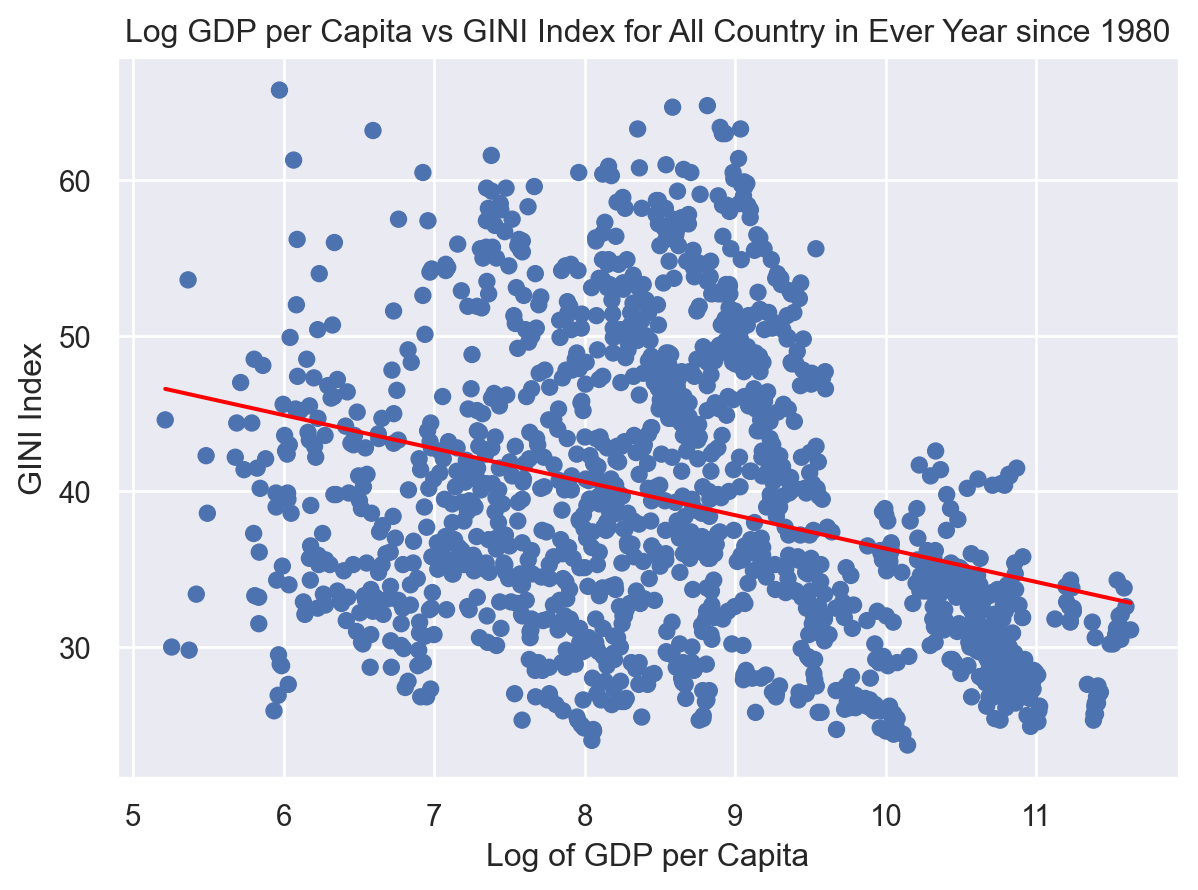

In [12]:
import seaborn.objects as so

so.Plot(graphing, x="log_gdp", y="GINI index (World Bank estimate)").add(so.Dot()).add(
    so.Line(color="red"), so.PolyFit(order=1)
).label(
    x="Log of GDP per Capita",
    y="GINI Index",
    title="Log GDP per Capita vs GINI Index for All Country in Ever Year since 1980",
)

In [13]:
results["ex6_relationship"] = "no"
print(
    "From the graph above, we can conlude that the higher the GINI score (or the higher the inequality), the smaller the Log GDP"
)

From the graph above, we can conlude that the higher the GINI score (or the higher the inequality), the smaller the Log GDP


### Exercise 7

It's important to not always rely too much on a single measure of something like inequality. To check the robustness of our result, let's be sure to also look at the relationship between inequality and income by using the income share of the richest 10% instead of just the Gini coefficient. Plot that relationship.

Do you also find that income inequality (as measured by the share of income accruing to the top 10% of earners) is positively or negatively correlated with gdp per capita? Store your answer in your `results` dict under the key `"ex7_relationship"` as the string `"positively correlated"` or the string `"negatively correlated"`.

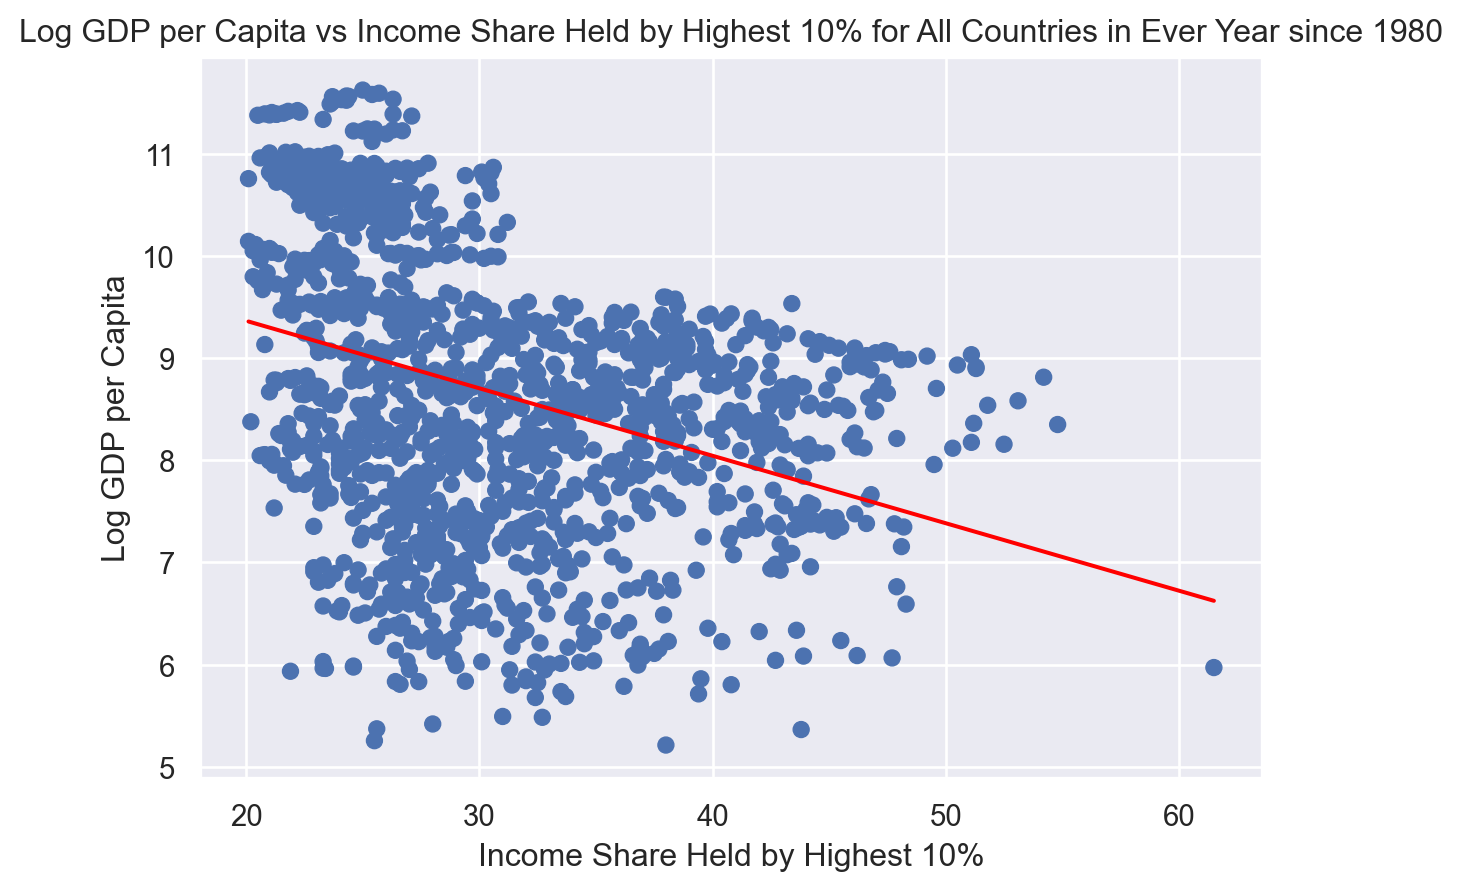

In [14]:
so.Plot(graphing, x="Income share held by highest 10%", y="log_gdp").add(so.Dot()).add(
    so.Line(color="red"), so.PolyFit(order=1)
).label(
    x="Income Share Held by Highest 10%",
    y="Log GDP per Capita",
    title="Log GDP per Capita vs Income Share Held by Highest 10% for All Countries in Ever Year since 1980",
)

In [15]:
results["ex7_relationship"] = "negatively correlated"
print(
    "From the graph above, we can conclude that the Income Share Held by Highest 10% and the Log GDP per Capita is {results['ex7_relationship']}"
)

From the graph above, we can conclude that the Income Share Held by Highest 10% and the Log GDP per Capita is {results['ex7_relationship']}


### Exercise 8

This analysis has allowed us to evaluate whether richer countries tend to have greater income inequality, but it certainly has not established whether we should expect that as countries become wealthier, their income distribution will also become more even. In other words, we have established a correlation between income inequality and wealth, but we certainly have not established a causal relationship between wealth and income inequality.

One way we might be able to get better traction on this question is to look at whether, as individual countries become wealthier, their income distribution also becomes more even.

To answer this question, let's begin by subsetting our data to the years 2005 to 2015 (inclusive)—the period in which the largest number of countries in our data have inequality data. Then also subset for the set of countries with Gini data for all years in this period. This gives us what's called a *balanced panel*—a dataset in which we have data on entities *at a number of different points in time* (a panel dataset) and where at every point in time, we have data for the *same set of entities* (a balanced panel dataset). 

Balanced panels are very desirable because the fact that they contain the same entities at all moments in time means that any changes we measure over time are the result of real changes in the outcomes we care about and *not* the result of changes in the composition of our sample.

Store the number of countries still in your data in `"ex8_countries_in_panel"`.

In [16]:
balance_panel = post_1980[(post_1980["Year"] >= "2005") & (post_1980["Year"] <= "2015")]
list_not_include = balance_panel[
    balance_panel["GINI index (World Bank estimate)"].isna()
]["Country Name"].unique()

excluded_df = balance_panel[~balance_panel["Country Name"].isin(list_not_include)]
print(
    "Below is the dataframe of countries with a GINI value in every single year from 2005 to 2015"
)
excluded_df

Below is the dataframe of countries with a GINI value in every single year from 2005 to 2015


Indicator Name,Country Name,Year,GDP per capita (constant 2010 US$),GINI index (World Bank estimate),Income share held by fourth 20%,Income share held by highest 10%,Income share held by highest 20%,Income share held by lowest 10%,Income share held by lowest 20%,Income share held by second 20%,Income share held by third 20%
576,Armenia,2005,2571.977128,36.0,20.2,30.8,44.7,3.3,8.1,11.8,15.2
577,Armenia,2006,2934.024882,29.7,22.1,24.5,38.8,3.7,8.9,13.1,17.0
578,Armenia,2007,3366.664939,31.2,22.1,25.1,40.0,3.5,8.4,12.8,16.7
579,Armenia,2008,3629.909091,29.2,22.4,23.7,38.4,3.9,9.1,13.1,17.0
580,Armenia,2009,3137.346098,28.0,22.4,22.9,37.5,4.0,9.4,13.5,17.2
...,...,...,...,...,...,...,...,...,...,...,...
14801,United Kingdom,2011,39413.323879,33.2,22.8,25.3,40.7,2.9,7.4,12.2,16.8
14802,United Kingdom,2012,39706.610083,32.3,23.1,24.6,40.0,3.1,7.6,12.3,17.0
14803,United Kingdom,2013,40248.743195,33.2,23.1,25.3,40.5,2.9,7.4,12.2,16.9
14804,United Kingdom,2014,41124.121650,34.0,22.9,26.1,41.2,2.9,7.3,12.0,16.6


In [17]:
results["ex8_countries_in_panel"] = excluded_df["Country Name"].nunique()
print(
    f"From the dataframe above, the number of remaining countries is {results['ex8_countries_in_panel']}"
)

From the dataframe above, the number of remaining countries is 42


### Exercise 9

Now, demean both Gini coefficient scores and log GDP per capita for all countries. In other words, for each country, calculate that country's average Gini score over this period and subtract that average from all of the country's Gini scores, then do the same for log GDP per capita. Then plot these countries' *demeaned* Gini scores against demeaned log GDP per capita.

Essentially, this is a way of looking at whether, when countries are richer than their average during this period, they have more equal income distributions than on average.

In [18]:
excluded_df["log_gdp"] = np.log(excluded_df["GDP per capita (constant 2010 US$)"])
excluded_df["country_gini_mean"] = excluded_df.groupby("Country Name")[
    "GINI index (World Bank estimate)"
].transform("mean")
excluded_df["demean_GINI"] = (
    excluded_df["GINI index (World Bank estimate)"] - excluded_df["country_gini_mean"]
)

excluded_df["country_gdp_mean"] = excluded_df.groupby("Country Name")[
    "log_gdp"
].transform("mean")
excluded_df["demean_gdp"] = excluded_df["log_gdp"] - excluded_df["country_gdp_mean"]
print(
    "The following dataframe below as the demean values for both GDP and GINI for each country-year pair"
)
excluded_df

The following dataframe below as the demean values for both GDP and GINI for each country-year pair


Indicator Name,Country Name,Year,GDP per capita (constant 2010 US$),GINI index (World Bank estimate),Income share held by fourth 20%,Income share held by highest 10%,Income share held by highest 20%,Income share held by lowest 10%,Income share held by lowest 20%,Income share held by second 20%,Income share held by third 20%,log_gdp,country_gini_mean,demean_GINI,country_gdp_mean,demean_gdp
576,Armenia,2005,2571.977128,36.0,20.2,30.8,44.7,3.3,8.1,11.8,15.2,7.852430,30.690909,5.309091,8.121420,-0.268989
577,Armenia,2006,2934.024882,29.7,22.1,24.5,38.8,3.7,8.9,13.1,17.0,7.984130,30.690909,-0.990909,8.121420,-0.137289
578,Armenia,2007,3366.664939,31.2,22.1,25.1,40.0,3.5,8.4,12.8,16.7,8.121678,30.690909,0.509091,8.121420,0.000258
579,Armenia,2008,3629.909091,29.2,22.4,23.7,38.4,3.9,9.1,13.1,17.0,8.196963,30.690909,-1.490909,8.121420,0.075543
580,Armenia,2009,3137.346098,28.0,22.4,22.9,37.5,4.0,9.4,13.5,17.2,8.051133,30.690909,-2.690909,8.121420,-0.070287
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14801,United Kingdom,2011,39413.323879,33.2,22.8,25.3,40.7,2.9,7.4,12.2,16.8,10.581859,33.936364,-0.736364,10.601617,-0.019758
14802,United Kingdom,2012,39706.610083,32.3,23.1,24.6,40.0,3.1,7.6,12.3,17.0,10.589273,33.936364,-1.636364,10.601617,-0.012345
14803,United Kingdom,2013,40248.743195,33.2,23.1,25.3,40.5,2.9,7.4,12.2,16.9,10.602834,33.936364,-0.736364,10.601617,0.001217
14804,United Kingdom,2014,41124.121650,34.0,22.9,26.1,41.2,2.9,7.3,12.0,16.6,10.624350,33.936364,0.063636,10.601617,0.022733


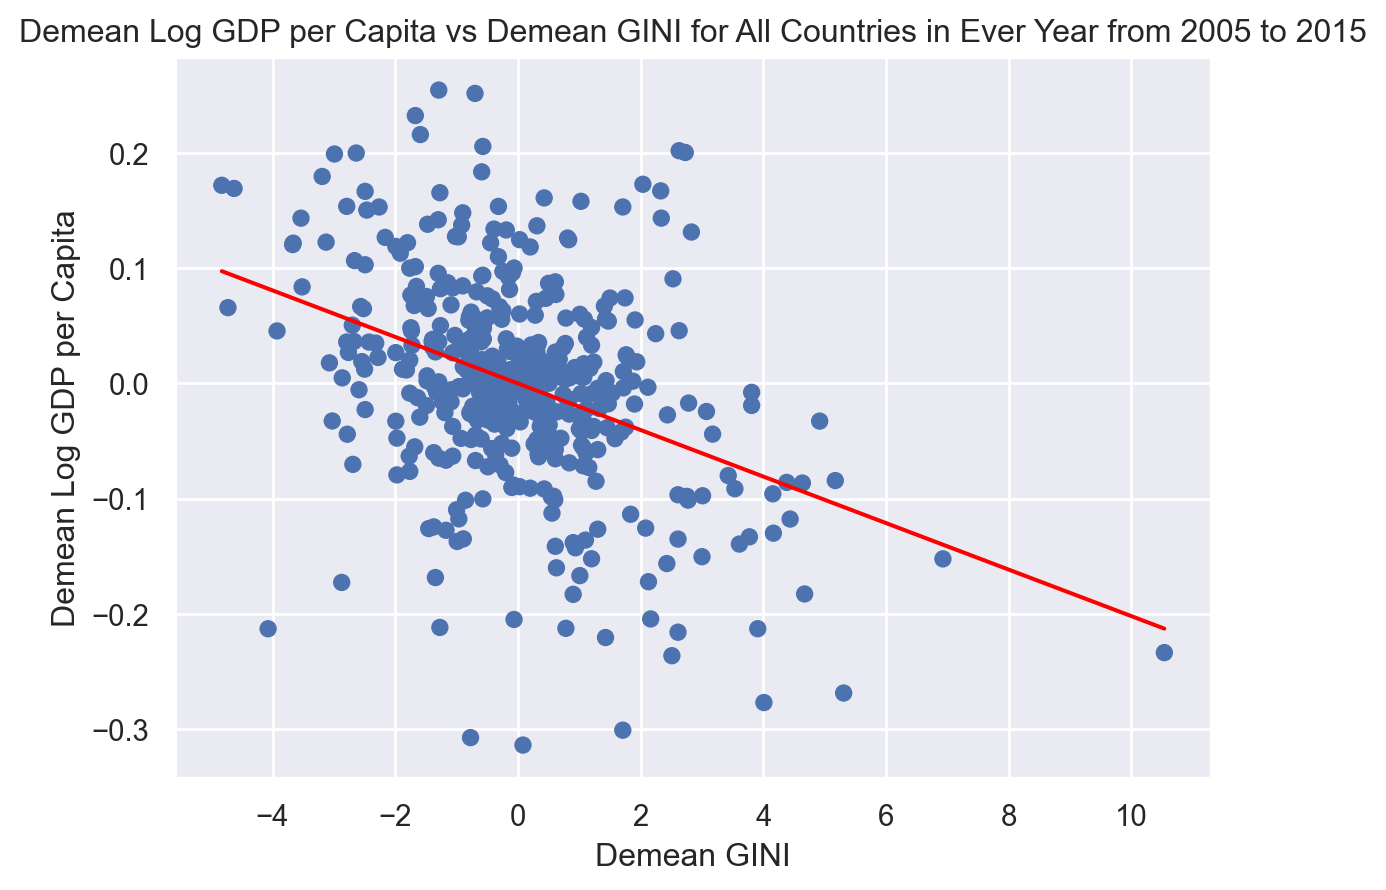

In [19]:
so.Plot(excluded_df, x="demean_GINI", y="demean_gdp").add(so.Dot()).add(
    so.Line(color="red"), so.PolyFit(order=1)
).label(
    x="Demean GINI",
    y="Demean Log GDP per Capita",
    title="Demean Log GDP per Capita vs Demean GINI for All Countries in Ever Year from 2005 to 2015",
)

### Exercise 10 

Calculate the correlation between these two demand outcomes in our balanced panel and store the result in `"ex10_demeaned_corr"`.

In [20]:
print(
    "The following below is a table that shows the correlation between the demeaned values for both GINI and GDP"
)
excluded_df[["demean_GINI", "demean_gdp"]].corr()

The following below is a table that shows the correlation between the demeaned values for both GINI and GDP


Indicator Name,demean_GINI,demean_gdp
Indicator Name,,
demean_GINI,1.000000,-0.389912
demean_gdp,-0.389912,1.000000


In [21]:
results["ex10_demeaned_corr"] = (
    excluded_df[["demean_GINI", "demean_gdp"]].corr().iloc[0][1]
)
print(
    f"The correlation between the demeaned values for both GINI and GDP is {results['ex10_demeaned_corr']}"
)

The correlation between the demeaned values for both GINI and GDP is -0.3899123518332568
